## Data Project - Stock Market Analysis  

В этом проекте мы будем изучать данные по фондовому рынку, в частности по акциям некоторых успешных технологических компаний. Рассмотрим базовый анализ биржевой информаци и несколько способов анализа рисков вложений в акции на основе их предыдущей стоимости. Также будем прогнозировать будущие цены на акции с помощью метода Монте-Карло.  

Ответим на следующие вопросы:

- Как изменилась цена акций с течением времени?
- Какова была средняя дневная доходность акций?
- Какой была скользящая средняя для различных акций?
- Какова была взаимосвязь между ценами закрытия различных акций?
- Какова была взаимосвязь между дневной доходностью разных акций?
- Насколько мы рискуем, инвестируя в ту или иную акцию?
- Как мы можем попытаться предсказать будущее поведение акций?  

In [1]:
#импортируем необходимые библиотеки
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from pandas_datareader import data

from datetime import datetime
import os
import pandas_datareader as pdr
import pandas_datareader.data as web

In [2]:
#воспользуемся Yahoo и pandas чтобы получить данные

tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock]= pdr.DataReader(stock,'yahoo',start,end)

In [3]:
#посмотрим сводную статистику по AAPL за последний год

AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,96.661769,93.912796,95.267668,95.347075,1.515932e+08,95.043799
std,22.094637,21.579913,22.011907,21.809814,7.388011e+07,21.954182
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,78.167503,76.220001,77.025002,77.385002,1.036460e+08,76.744728
50%,92.970001,90.910004,91.279999,91.632500,1.354804e+08,91.310051
75%,117.279999,114.129997,115.982498,115.750000,1.830554e+08,115.550644
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.690002


In [4]:
#общая информация

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

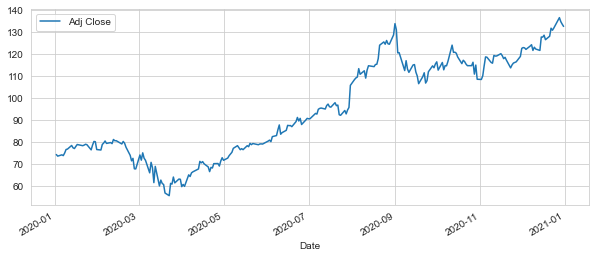

In [5]:
#посмотрим исторический обзор цен закрытия

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

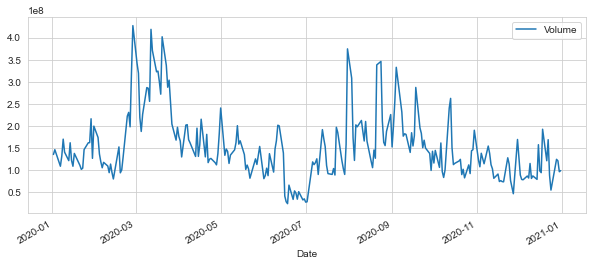

In [6]:
#общий объем продажb акций ежедневно в течение последнего года

AAPL['Volume'].plot(legend=True,figsize=(10,4))

Объем продажи акций Apple резко увеличился в период март-май 2020. На этот период пришлась пандемия Короновируса, повлекшая за собой беспрецедентную экономическую ситуацию.

In [7]:
#рассчитаем moving average (скользящая средняя) для акций

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()    

<AxesSubplot:xlabel='Date'>

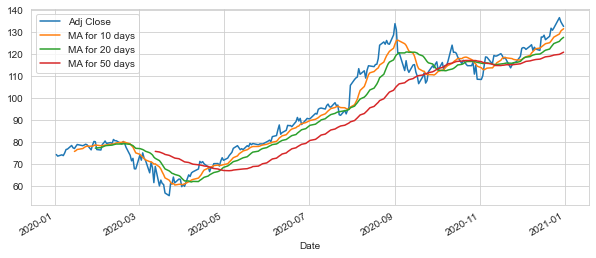

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

### Ежедневный анализ доходности  

Теперь, когда мы провели базовый анализ, продолжим и погрузимся немного глубже. Теперь мы проанализируем риски. Для этого нам нужно внимательнее взглянуть на дневные изменения акций, а не только на их абсолютную стоимость. Продолжим и посмотрим ежедневную прибыли по акциям Apple.

<AxesSubplot:xlabel='Date'>

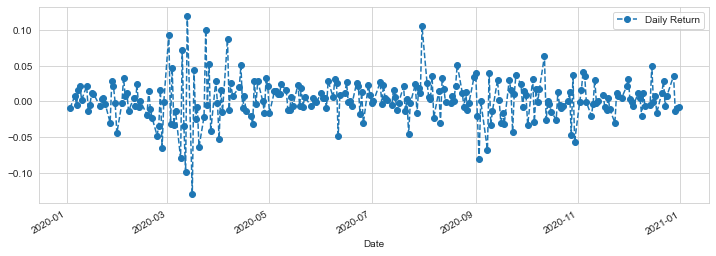

In [9]:
#найдем процент доходности, чтобы оценить риски

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return'>

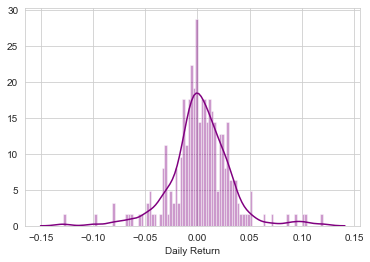

In [10]:
#теперь посмотрим среднесуточный доход

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [11]:
#проанализируем доходность всех акций в нашем списке
#создадим DataFrame со всеми столбцами ['Close'] для каждого из фреймов данных акций

closing_df = pdr.DataReader(['AAPL','GOOG','MSFT','AMZN', 'TSLA'],'yahoo',start,end)['Adj Close']

In [12]:
closing_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-12-24,131.970001,1738.849976,222.750000,3172.689941,661.770020
2020-12-28,136.690002,1776.089966,224.960007,3283.959961,663.690002
2020-12-29,134.869995,1758.719971,224.149994,3322.000000,665.989990
2020-12-30,133.720001,1739.520020,221.679993,3285.850098,694.780029
2020-12-31,132.690002,1751.880005,222.419998,3256.929932,705.669983


In [13]:
#теперь посмотрим на ежедневный доход аналогично тому, как смотрели для Apple

tech_rets = closing_df.pct_change()

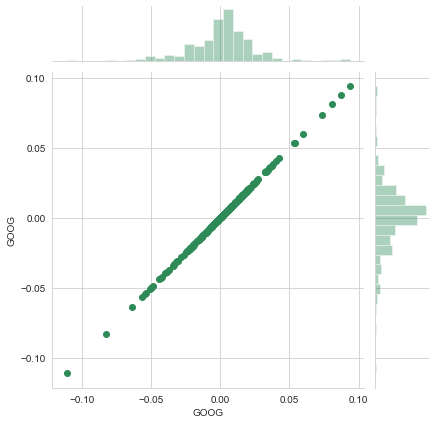

In [14]:
#теперь мы можем сравнить дневную процентную доходность двух акций, чтобы проверить, насколько они коррелированы
#сравнение Google с самим собой должно показатьсовершенно линейную зависимость

sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

Итак, теперь мы видим, что если две акции идеально коррелируют друг с другом, должна возникнуть линейная зависимость между их значениями дневной доходности. Продолжим и сравним Google и Microsoft таким же образом.

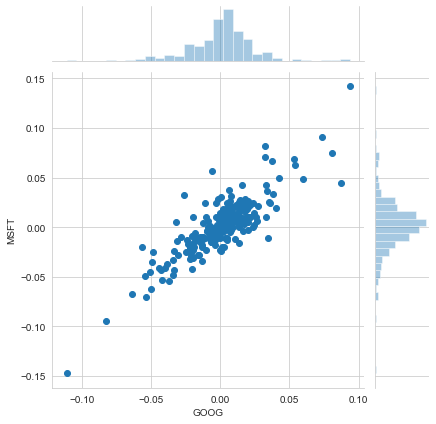

In [15]:
#процент доходности Google и Microsoft

sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Мы видим, что акции коррелируют не очень хорошо

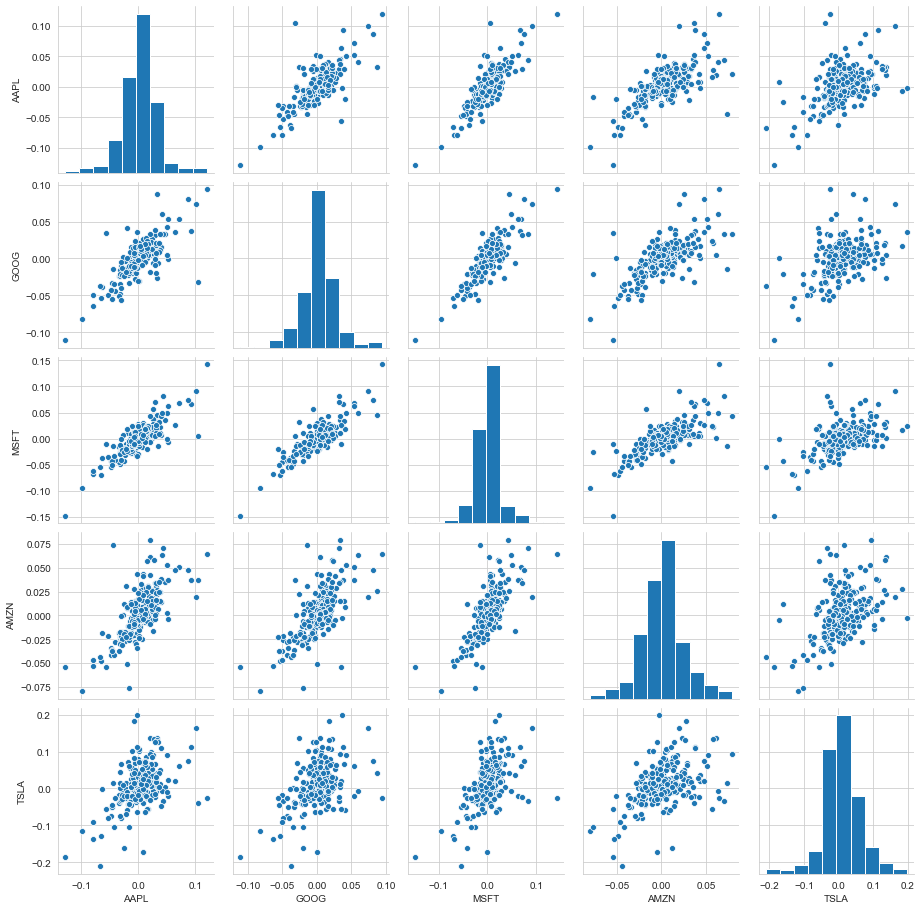

In [16]:
#выведем парный график в нашем DataFrame для автоматического визуального анализа и сравнения

sns.pairplot(tech_rets.dropna())

Выше мы можем увидеть все отношения ежедневной доходности между всеми акциями. Беглый взгляд показывает интересную корреляцию между ежедневными доходами Google и Apple, Google и Microsoft.

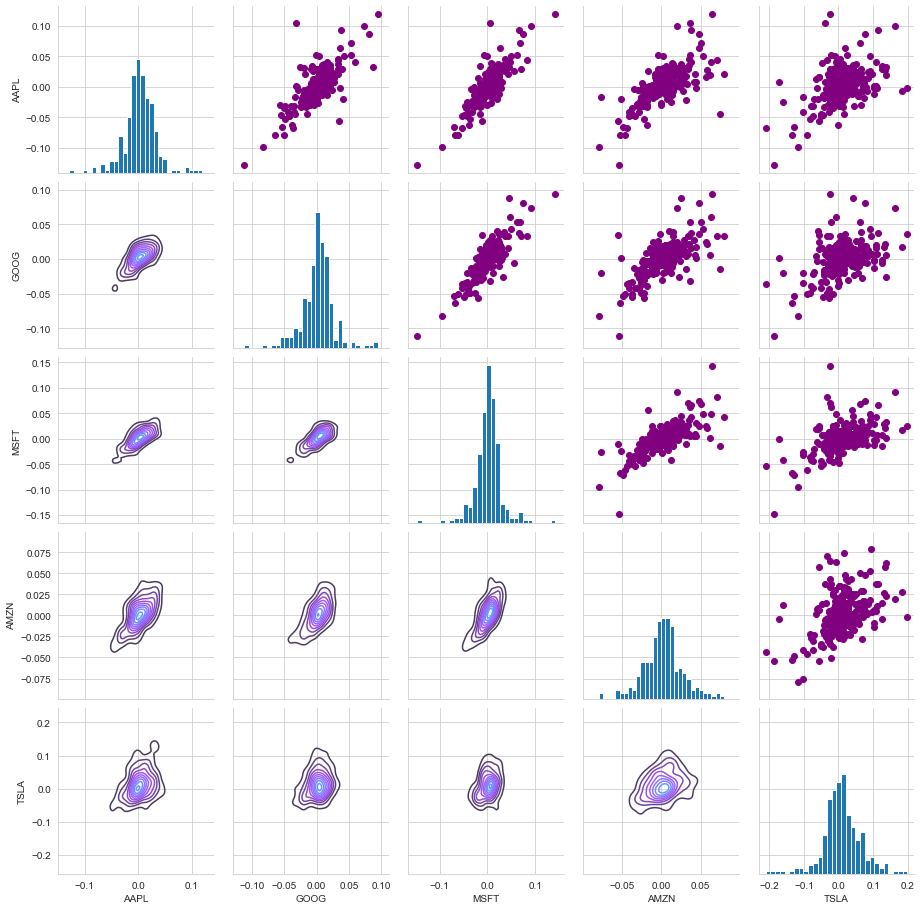

In [17]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Посмотрим так же корреляцию цен закрытия

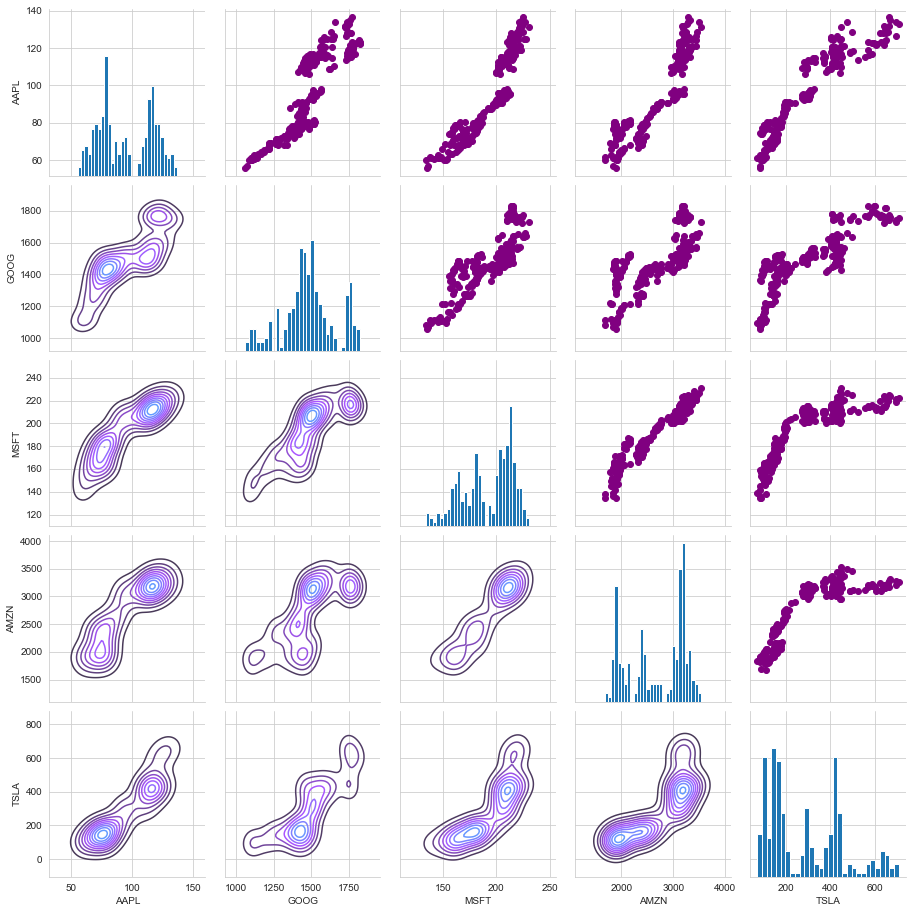

In [18]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

### Анализ рисокв

Есть много способов количественной оценки риска. Один из основных способов использования собранной нами информации о ежедневной процентной доходности - это сравнение ожидаемой доходности со стандартным отклонением дневной доходности.

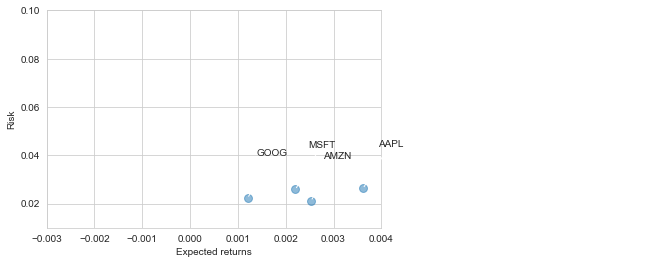

In [124]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.100])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (40, 40),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

Определим параметр стоимости, подверженной риску для акций. Мы можем рассматривать стоимость, подверженную риску, как сумму денег, которую мы можем ожидаемо потерять в течение заданного временного интервала. Есть несколько методов, которые мы можем использовать для оценки стоимости, подверженной риску.

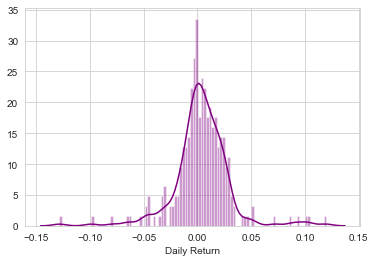

In [125]:
#гистограмма дневной доходности для акций Apple

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Теперь мы можем использовать квантиль, чтобы получить значение риска для акций

In [126]:
#эмпирический квантиль ежедневной доходности 0,05 для Apple

rets['AAPL'].quantile(0.05)

-0.03421546526840809

Эмпирический квантиль дневной доходности 0,05 составляет -0,034. Это означает, что с вероятностью 95% наша худшая дневная потеря не превысит 3,4%. Если у нас есть инвестиции в размере 1 000 000 долларов, наша однодневная 5\%-ная VaR составляет 0,034 * 1 000 000 = 34 000 долларов

### Применим метод Монте-Карло

In [128]:
#определим переменные, которые мы будем использовать в Google DataFrame GOOG

days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [133]:
#создадим функцию, которая принимает начальную цену и количество дней, и использует сигму и мю, 
#которые мы уже рассчитали для ежедневной доходности

def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

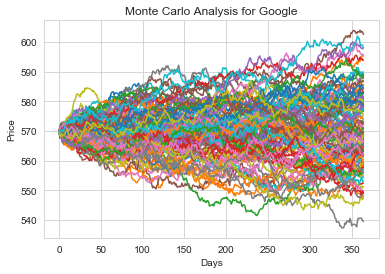

In [134]:
#получим начальную цену от GOOG.head()

start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [135]:
#получим гистограмму конечных результатов для гораздо большего периода

runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

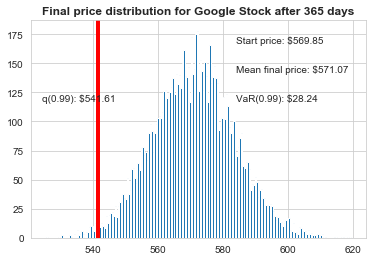

In [136]:
#построим гистограмму, а также используем qunatile для определения риска для этой акции

q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Мы рассмотрели 1% -ный эмпирический квантиль окончательного ценового распределения, чтобы оценить подверженную риску стоимость акций Google, которая составляет 28,24 доллара на каждую инвестицию в 569,85 (цена одной исходной акции Google).

Это в основном относится к каждой первоначальной акции, которую вы покупаете, подвергая риску около 28,24 долларов в 99% случаев из нашего моделирования Монте-Карло.

#### Применим метод Монте-Карло для акций Tesla

Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

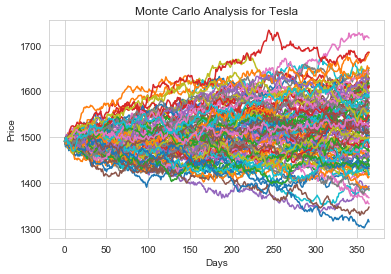

In [139]:
days = 365
dt = 1/days
mu = rets.mean()['TSLA']
sigma = rets.std()['TSLA']

start_price = 1490.82

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

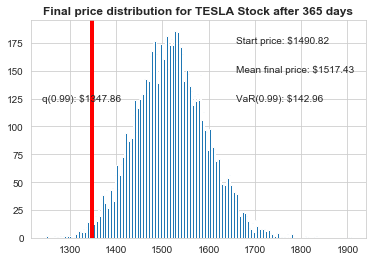

In [141]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for TESLA Stock after %s days" % days, weight='bold');

Мы рассмотрели 1% -ный эмпирический квантиль окончательного ценового распределения, чтобы оценить подверженную риску стоимость акций Tesla, которая составляет 142,96 доллара на каждую инвестицию в 1490,82 (цена одной исходной акции Tesla).

Это в основном относится к каждой первоначальной акции, которую вы покупаете, подвергая риску около 142,96 долларов в 99% случаев из нашего моделирования Монте-Карло.